In [2]:
from api.tools.classify import classify_wallet
import os
import pandas as pd

c:\Users\wankm\Projects\eth-graph-fraud-detection\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample JSON graph data
data = scores.graph[5]
def draw_graph(data):
    # Create a graph object
    G = nx.DiGraph()  # Use DiGraph for directed graphs

    # Add nodes
    for node in data['nodes']:
        G.add_node(node['id'], label=node['label'])

    # Add edges
    for edge in data['edges']:
        if edge['source'] != edge['target']:
            G.add_edge(edge['source'], edge['target'], weight=edge['value'], timestamp=edge['timestamp'])

    # Draw the graph
    plt.figure(figsize=(12, 8))

    # Layout for better visualization
    pos = nx.spring_layout(G)

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
    nx.draw_networkx_labels(G, pos, labels={node['id']: node['label'][:8] + '...' for node in data['nodes']}, font_size=8)

    # Display edge weights
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.5f}" for k, v in edge_labels.items()})

    # Show plot
    plt.title("Graph Visualization")
    plt.axis('off')
    plt.show()


In [50]:
#########
model="first_Feather-G_RF.joblib"
#########

dir_path = 'api/data/eth_transactions/Normal first-order nodes'
normal_wallets = []
for filename in os.listdir(dir_path):
    normal_wallets.append(filename[:-4])
phishing_wallets = []
dir_path = 'api/data/eth_transactions/Phishing first-order nodes'
for filename in os.listdir(dir_path):
    phishing_wallets.append(filename[:-4])
ponzi_wallets = []
dir_path = 'api/data/eth_transactions/Ponzi first-order nodes'
for filename in os.listdir(dir_path):
    ponzi_wallets.append(filename[:-4]) 

#scores = pd.DataFrame(columns=['wallet', 'graph', 'score', 'type'])
errors = []

for wallet in normal_wallets:
    try:
        if wallet not in scores['wallet'].values:
            score , graph = classify_wallet(wallet,model)
            scores = scores.append({'wallet': wallet, 'graph': graph, 'score': score, 'type': 'normal'}, ignore_index=True)
        else:
            print("Already classified: ", wallet)
    except Exception as e:
        print("Error in wallet: ", wallet, " ", e)
        errors.append(wallet)
for wallet in phishing_wallets:
    try:
        if wallet not in scores['wallet'].values:
            score , graph = classify_wallet(wallet,model)
            scores = scores.append({'wallet': wallet, 'graph': graph, 'score': score, 'type': 'phishing'}, ignore_index=True)
        else:
            print("Already classified: ", wallet)
    except Exception as e:
        print("Error in wallet: ", wallet, " ", e)
        errors.append(wallet)
for wallet in ponzi_wallets:
    try:
        if wallet not in scores['wallet'].values:
            score , graph = classify_wallet(wallet,model)
            scores = scores.append({'wallet': wallet, 'graph': graph, 'score': score, 'type': 'ponzi'}, ignore_index=True)
        else:
            print("Already classified: ", wallet)
    except Exception as e:
        print("Error in wallet: ", wallet, " ", e)
        errors.append(wallet)



Already classified:  0x0000000000000000000000000000000000000000
Already classified:  0x000419c40a811a052b56372f4a80823be47db756
Already classified:  0x000e0e5701b14fb77160bcc7bfe7256522d5927b
Already classified:  0x00267e4a01f25072e0e9347a2ccdd67091d7aeac
Already classified:  0x00316d956f5f35591ae021f4858a2a865c6ba02a
Already classified:  0x0034cf6e02f4c47fb30df22fc81b8dedddbf1fb0
Already classified:  0x004e3def0c754a921af751d1004df95f9650ea00
Already classified:  0x005bdf2845064db405f5c99aaf9510d0b19e7ac2
Already classified:  0x005e288d713a5fb3d7c9cf1b43810a98688c7223
Already classified:  0x006deef69f1b3c01173b5ba74a5de9050e72d702
Already classified:  0x007c508c6368d2ad35608cb8e98edc9ef1bf0e84
Already classified:  0x00a2df284ba5f6428a39dff082ba7ff281852e06
Already classified:  0x00a80d1f0649358af50c5b9263777e4b1dcec366
Already classified:  0x00ce8ad7e44fea30ecbe2fb69963eaa26b5b56a0
Already classified:  0x00d681a7b6584f978f63c81cfd847064ce19a080
Already classified:  0x00e5c013694c9ee92

In [44]:
scores.to_csv('api/data/eth_transactions/scores.csv', index=False, sep=';')

In [49]:
scores.groupby('type').describe()

score                                                              \
           count      mean       std       min       25%       50%       75%   
type                                                                           
normal    1700.0  0.057687  0.139462  0.000035  0.001372  0.007729  0.037012   
phishing  1660.0  0.941305  0.128249  0.008245  0.964391  0.989226  0.994401   
ponzi      135.0  0.785691  0.266648  0.073812  0.651722  0.900520  0.987007   

                    
               max  
type                
normal    0.991831  
phishing  0.996424  
ponzi     0.995376

type
normal      [[AxesSubplot(0.125,0.11;0.775x0.77)]]
phishing    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
ponzi       [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

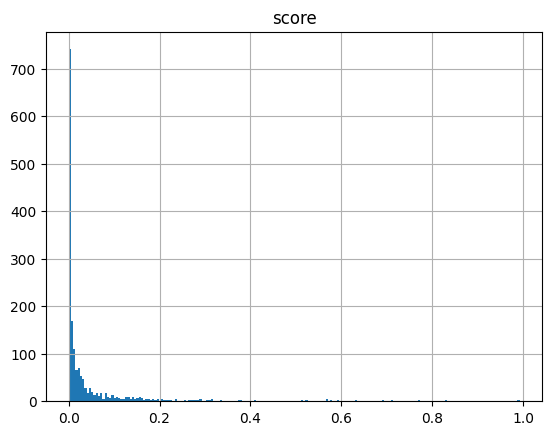

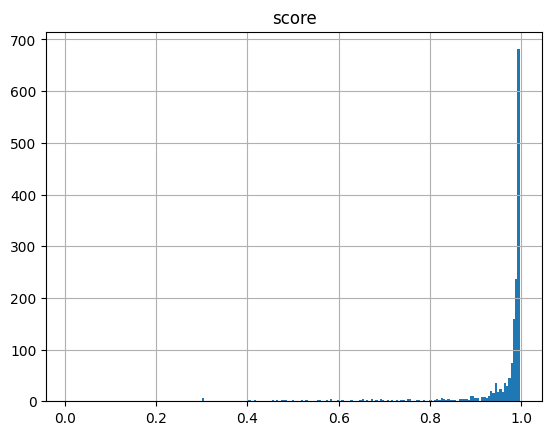

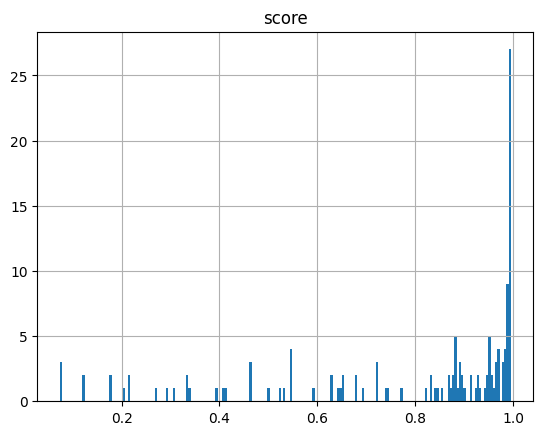

In [48]:
scores.groupby('type').hist(bins=200)

In [3]:
scores =pd.read_csv('api/data/eth_transactions/scores.csv', sep=';')
scores

,wallet,graph,score,type
0,0x0000000000000000000000000000000000000000,"{'nodes': [{'id': '0', 'label': '0xa89ac93b233...",0.224102,normal
1,0x000419c40a811a052b56372f4a80823be47db756,"{'nodes': [{'id': '0', 'label': '0xa3283f85ae1...",0.379908,normal
2,0x000e0e5701b14fb77160bcc7bfe7256522d5927b,"{'nodes': [{'id': '0', 'label': '0x535de4eb0f2...",0.008009,normal
3,0x00267e4a01f25072e0e9347a2ccdd67091d7aeac,"{'nodes': [{'id': '0', 'label': '0x006b8640487...",0.036635,normal
4,0x00316d956f5f35591ae021f4858a2a865c6ba02a,"{'nodes': [{'id': '0', 'label': '0x613b560e1c9...",0.003978,normal
...,...,...,...,...
3490,0xfc3c1c0550188c649f70e78787c8cd9ff9d3b8d4,"{'nodes': [{'id': '0', 'label': '0xd5b1e4a1eea...",0.879625,ponzi
3491,0xfc5de599c9fe4e5cf0744aef3139ae53aa30a566,"{'nodes': [{'id': '0', 'label': '0xd45c1551190...",0.410999,ponzi
3492,0xfd2487cc0e5dce97f08be1bc8ef1dce8d5988b4d,"{'nodes': [{'id': '0', 'label': '0x45ab6108cc4...",0.203382,ponzi
3493,0xfe3672eff595cfd36ed05aaf4622d1aec3b5e852,"{'nodes': [{'id': '0', 'label': '0xab092d201cc...",0.993283,ponzi


In [16]:
#find 5 phishing wallets with highest score
phishing_scores = scores[scores['type'] == 'ponzi']
phishing_scores = phishing_scores.sort_values(by='score', ascending=False)
phishing_scores = phishing_scores.head(5)
phishing_scores

,wallet,graph,score,type
3399,0x4865e85c72a27ca6c362da75ba6707c07464b953,"{'nodes': [{'id': '0', 'label': '0x2400092fb7b...",0.995376,ponzi
3489,0xf835b307bc5348194ae01ed729170c84217ba688,"{'nodes': [{'id': '0', 'label': '0xa6e2e910515...",0.995376,ponzi
3384,0x3325439082ff8ba7371dfdaa1af297bbfcac21b2,"{'nodes': [{'id': '0', 'label': '0x2d621350c9f...",0.995311,ponzi
3380,0x294308484f47ff5a833a284ac6949eb02728fbe4,"{'nodes': [{'id': '0', 'label': '0x627fbcc6d05...",0.995216,ponzi
3443,0xa83c4a6d0418074655bdbe74fed8435c46c19f66,"{'nodes': [{'id': '0', 'label': '0xec4c079dafe...",0.995117,ponzi


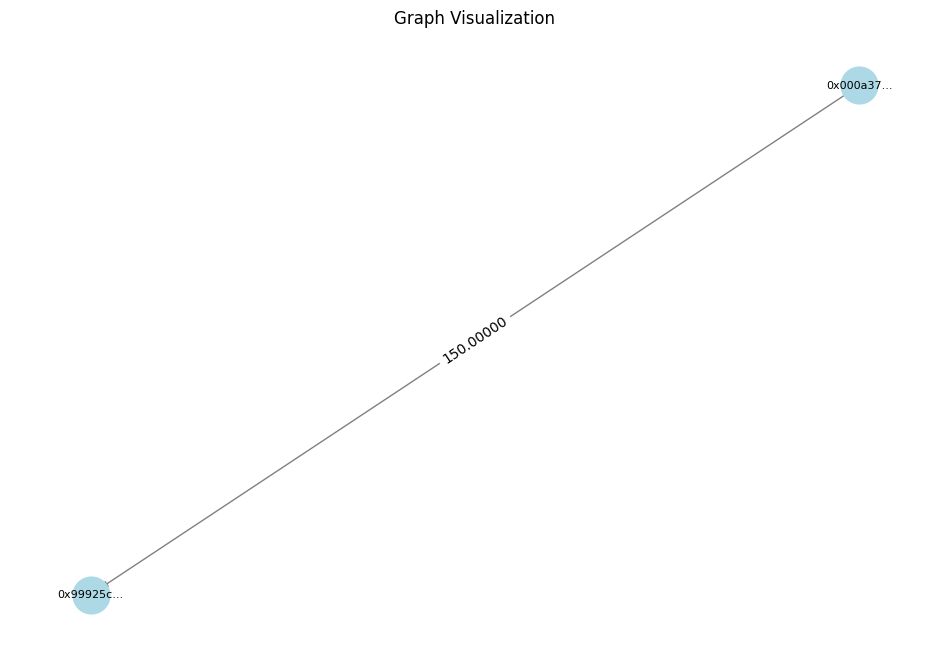

In [104]:
data = scores[scores.wallet == "0x99925cc9a57f5e473ff22314cfe0627a0bfcceb4"].graph.values[0]
draw_graph(data)

Fetching transactions for wallet: 0x44705e1d11142cd7b0bdfb2ecc0c63784a31f14f...
Found 68 transactions.
64 transactions remaining after filtering value 0.
Filtered transactions saved to api/data/eth_transactions/etherscan/0x44705e1d11142cd7b0bdfb2ecc0c63784a31f14f.csv


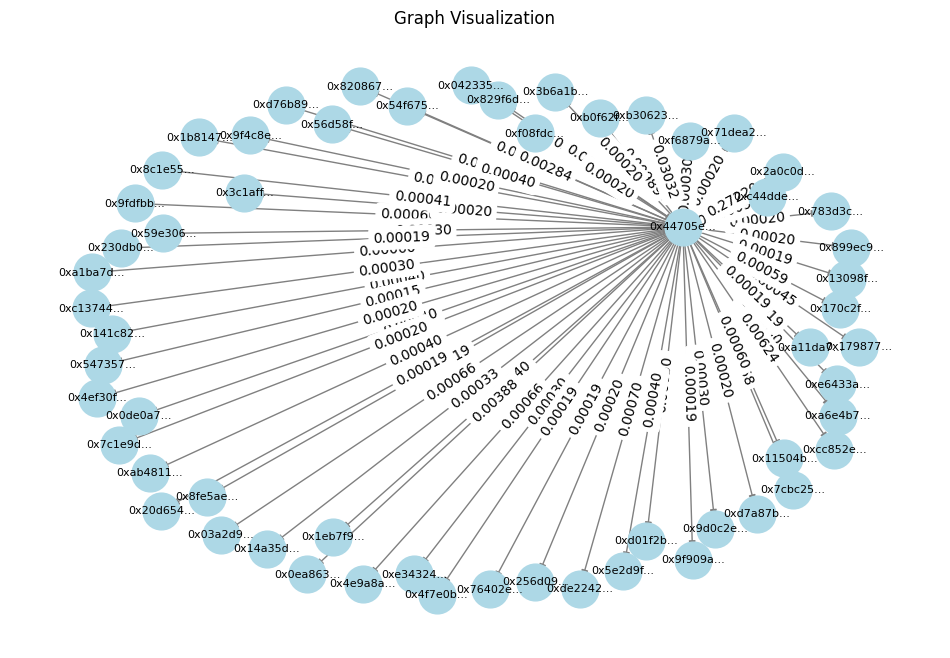

0.9964242018615558

In [19]:
model="first_Feather-G_RF.joblib"
wallet = "0x44705e1d11142cd7b0bdfb2ecc0c63784a31f14f" #phishing
#wallet = "0xc0a46445187918d2bd84dfc7051ce4f2a588ac7d" #normal
#wallet = "0xa83c4a6d0418074655bdbe74fed8435c46c19f66" #ponzi
score , graph = classify_wallet(wallet,model)
draw_graph(graph)
score